<a href="https://colab.research.google.com/github/jackhegarty3/Data201-Fall2025/blob/main/DATA201_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project 2: Predicting NBA Game Results Using Logistic Regression**
Jack Hegarty, Viktoriia Lyon, Arash Kamangir

Professor Abdirisak Mohamed  
DATA 201   
December 4, 2025  

## Introduction

This [dataset](https://www.kaggle.com/datasets/nathanlauga/nba-games/data) contains per-game statistics from all NBA games between October 2004 and December 2020. It was originally sourced from the official NBA website and aggregated on Kaggle. It contains the team statistics, game metadata, and game outcomes of 26,552 professional basketball games.

### Relevant Variables

Predictors:

*   PTS_Home: The total points scored by the home team
*   PTS_Away: The total points scored by the away team
*   FG_PCT_home: The field goal percentage of the home team
*   FG_PCT_away: The field goal percentage of the away team
*   FT_PCT_home: The free throw percentage of the home team
*   FT_PCT_away: The free throw percentage of the away team
*   FG3_PCT_home: The three-point field goal percentage of the home team
*   FG3_PCT_away: The three-point field goal percentage of the away team
*   AST_home: The total assists by the home team
*   AST_home: The total assists by the away team
*   REB_home: The total rebounds by the home team
*   REB_away: The total rebounds by the away team

Target:

*   HOME_TEAM_WINS: Binary variable that measures whether the home team won the game

### Areas of Interest

*   Can we predict which team wins an NBA game using box score statistics?
*   Which statistics contribute most to predicting game outcomes?
*   Are home teams significantly more likely to win? If so, how much more?
*   How accurate is logistic regression for predicting NBA outcomes?



## Data Preparation



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import libraries and load dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/games.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
# Drop irrelevant identifier columns and drop Point Totals for each team to prevent data leakage

df = df.drop(columns=['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away', 'PTS_home', 'PTS_away'])
df.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,1
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,1
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,1
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,1
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
df.shape

(26651, 11)

In [ ]:
# Drop 99 games with NA values

df = df.dropna()
df.shape

(26552, 11)

In [ ]:
# Convert percentage values to make coefficients more sensible

pct_cols = ['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away']
df[pct_cols] = df[pct_cols] * 100
df.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,48.4,92.6,38.2,25.0,46.0,47.8,81.5,32.1,23.0,44.0,1
1,48.8,95.2,45.7,16.0,40.0,56.1,76.5,33.3,20.0,37.0,1
2,48.2,78.6,31.3,22.0,37.0,47.0,68.2,43.3,20.0,46.0,1
3,44.1,90.9,29.7,27.0,49.0,39.2,73.5,26.1,15.0,46.0,1
4,42.9,100.0,37.8,22.0,47.0,50.0,77.3,29.2,20.0,47.0,0


## Exploratory Data Analysis

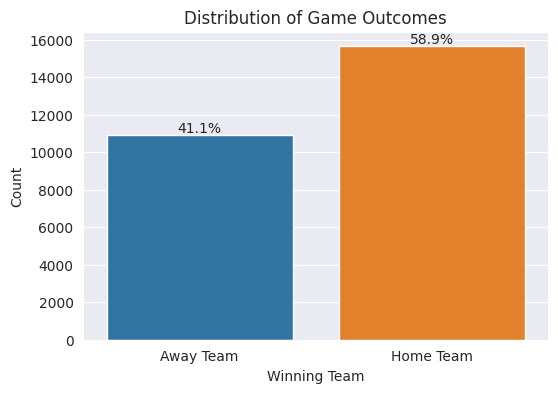

In [ ]:
# Charting game outcomes to see the difference in win percentage between home and away team

sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
custom = ['Home Team', 'Away Team']
ax = sns.countplot(data=df, x='HOME_TEAM_WINS', hue='HOME_TEAM_WINS', legend=False)
plt.title("Distribution of Game Outcomes")
plt.xticks([1, 0], custom)

for p in ax.patches:
    height = p.get_height()
    total = df.shape[0]
    percentage = '{:.1f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height
    ax.text(x, y, percentage, ha='center', va='bottom')

plt.xlabel("Winning Team")
plt.ylabel("Count")
plt.show()

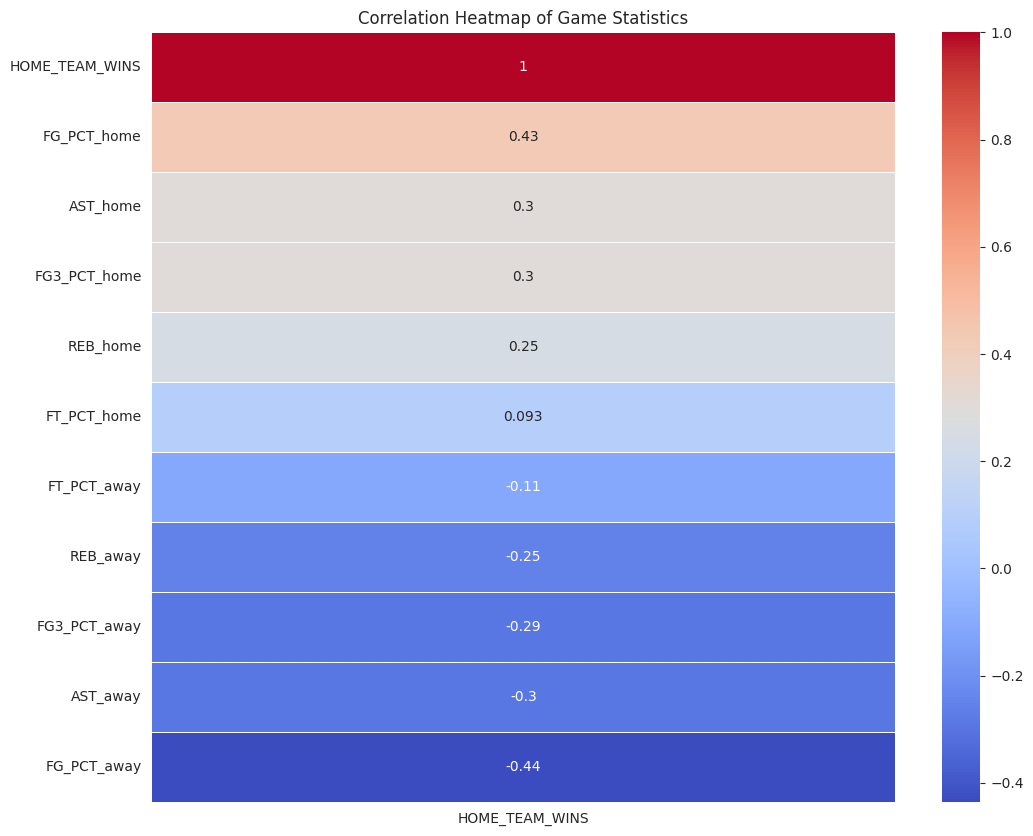

In [ ]:
#Checking whether any of our predictor variables correlate too heavily with the outcome

plt.figure(figsize=(12,10))
sns.heatmap(df.corr()[['HOME_TEAM_WINS']].sort_values(by='HOME_TEAM_WINS', ascending=False), cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of Game Statistics")
plt.show()

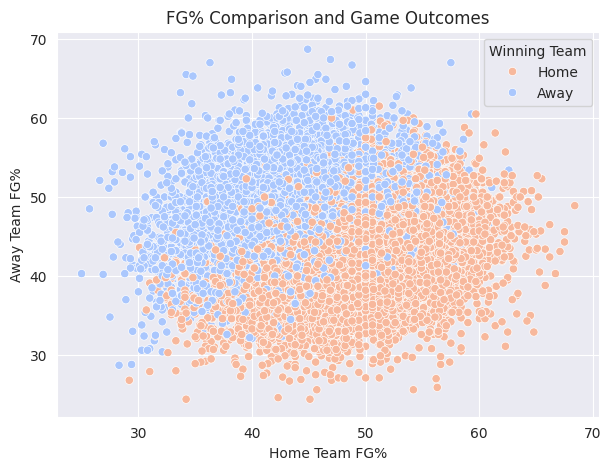

In [ ]:
# Exploring the relationship between Field Goal Percentage and Winning Team

plt.figure(figsize=(7,5))
label_mapping = {1: 'Home', 0: 'Away'}
sns.scatterplot(data=df, x='FG_PCT_home', y='FG_PCT_away', hue=df['HOME_TEAM_WINS'].map(label_mapping), palette="coolwarm_r")
plt.title("FG% Comparison and Game Outcomes")
plt.xlabel("Home Team FG%")
plt.ylabel("Away Team FG%")
plt.legend(title="Winning Team")
plt.show()

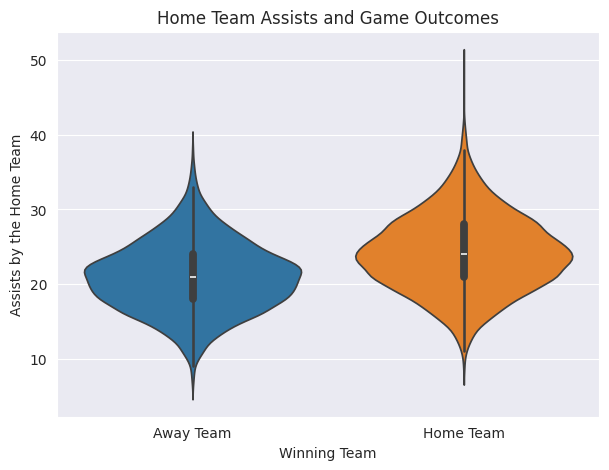

In [ ]:
# Exploring the relationship between Assists and Winning Team

plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='HOME_TEAM_WINS', y='AST_home', hue='HOME_TEAM_WINS', legend=False)
plt.title("Home Team Assists and Game Outcomes")
plt.xlabel("Winning Team")
plt.ylabel("Assists by the Home Team")
plt.xticks([1, 0], custom)

plt.show()

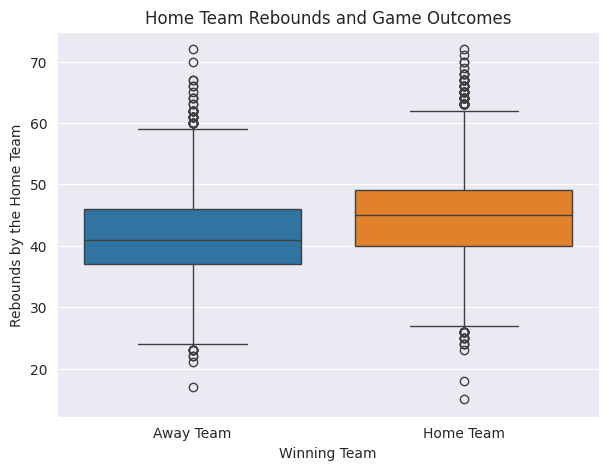

In [ ]:
# Exploring the relationship between Rebounds and Winning Team

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='HOME_TEAM_WINS', y='REB_home', hue='HOME_TEAM_WINS', legend=False)
plt.title("Home Team Rebounds and Game Outcomes")
plt.xlabel("Winning Team")
plt.ylabel("Rebounds by the Home Team")
plt.xticks([1, 0], custom)

plt.show()

## Logistic Regression Model

In [ ]:
# Split the data into training and testing groups

import sklearn as sk
from sklearn.model_selection import train_test_split

x = df.drop(columns=['HOME_TEAM_WINS'])
y = df['HOME_TEAM_WINS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=876)

In [ ]:
# Fit the training data to a logistic model, then view the coefficients and intercept

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty=None, solver = 'newton-cg', max_iter = 1000).fit(x_train,y_train)
print("Model Coefficients: ", log_reg.coef_)
print("\nModel Intercept: ", log_reg.intercept_)


Model Coefficients:  [[ 0.2503455   0.04199941  0.0481229   0.06973213  0.08982724 -0.24919772
  -0.04048362 -0.04476187 -0.07731061 -0.08965357]]

Model Intercept:  [0.15715335]


In [ ]:
# Show which variables the coefficients are associated with
# Convert most impactful coefficient from log odds to odds, and then to probability
import numpy as np
from math import e

coef = np.array([["FG PCT Home", 0.25],
          ["FT PCT Home", 0.042],
          ["3PT FG PCT Home", 0.048],
          ["AST Home", 0.07],
          ["REB Home", 0.09],
          ["FG PCT Away", -0.249],
          ["FT PCT Away", -0.04],
          ["3PT FG PCT Away", -0.045],
          ["AST Away", -0.077],
          ["REB Away", -0.09]
          ])
print(coef)
odds = (e ** 0.25)
print(odds)
prob = odds / (1 + odds)
print(prob)

[['FG PCT Home' '0.25']
 ['FT PCT Home' '0.042']
 ['3PT FG PCT Home' '0.048']
 ['AST Home' '0.07']
 ['REB Home' '0.09']
 ['FG PCT Away' '-0.249']
 ['FT PCT Away' '-0.04']
 ['3PT FG PCT Away' '-0.045']
 ['AST Away' '-0.077']
 ['REB Away' '-0.09']]
1.2840254166877414
0.5621765008857981


In [ ]:
# Use model to predict classes (game outcomes) of testing data

y_pred = log_reg.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('\nTest accuracy = ', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))


Test accuracy =  0.8465980416771278

Confusion Matrix: 
 [[2641  670]
 [ 552 4103]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      3311
           1       0.86      0.88      0.87      4655

    accuracy                           0.85      7966
   macro avg       0.84      0.84      0.84      7966
weighted avg       0.85      0.85      0.85      7966



In [ ]:
# Use model to predict class probabilities of testing data

y_prob = log_reg.predict_proba(x_test)[:, 1]

for pred, prob in zip(y_pred[:10], y_prob[:10]):
  print(f"Prediction: {pred}, Probability of Home Team Win: {(prob * 100):.1f}%")

Prediction: 1, Probability of Home Team Win: 84.6%
Prediction: 1, Probability of Home Team Win: 81.0%
Prediction: 0, Probability of Home Team Win: 14.6%
Prediction: 1, Probability of Home Team Win: 99.1%
Prediction: 0, Probability of Home Team Win: 0.3%
Prediction: 1, Probability of Home Team Win: 92.0%
Prediction: 1, Probability of Home Team Win: 78.8%
Prediction: 1, Probability of Home Team Win: 99.2%
Prediction: 1, Probability of Home Team Win: 93.5%
Prediction: 0, Probability of Home Team Win: 26.4%


## One vs. All & One vs. One

As our target variable has only two classes, the OvO and OvR scores are identical to the logistic regression accuracy of ~85%.

## Interpretation

*   Using game statistics, the model correctly predicts the outcome of an NBA nearly 85% of the time. This model has fairly strong predictive power for determining whether the home team wins.
*   The model resulted in significantly more false positives than false negatives. Its slight lean toward predicting home wins shows it overestimates the home team's advantage.
*   The model is better at predicting home wins than home losses, as shown by the 0.88 recall score for the positive class and the 0.80 recall score for the negative class.
*   A coefficient of 0.25 for home team field goal percentage corresponds to an odds ratio of 1.284. Converting this to a probability, a one-percentage-point increase in FG% increases the home team's probability of winning from 50% to approximately 56%. A five-percentage-point increase raises the win probability to approximately 78%.
*   The model has learned the statistical tendencies that lead home teams to win, such as superior shooting percentages, winning the rebounding battle, and better ball movement.





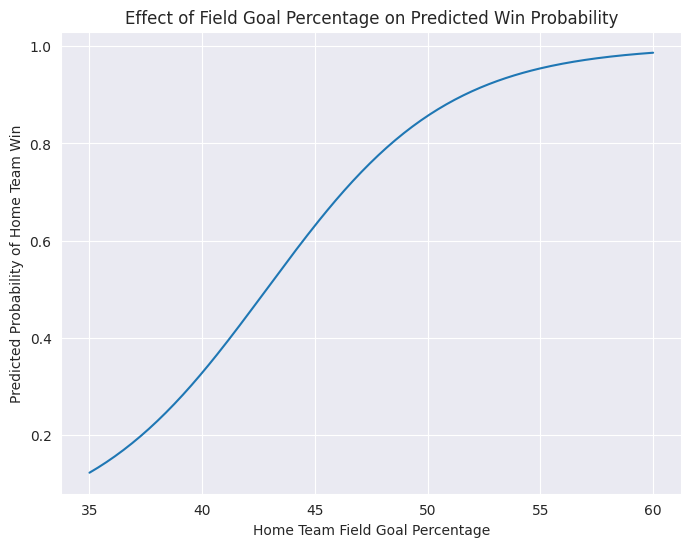

In [ ]:
# Visualize exactly how the model values FG% when predicting game outcomes

feature = "FG_PCT_home"
fg_values = np.linspace(35, 60, 200)
x_plot = x_test.copy().iloc[:200].reset_index(drop=True)
x_plot = x_plot.reindex(range(200))
x_plot[feature] = fg_values

for col in x_plot.columns:
  if col != feature:
    x_plot[col] = df[col].mean()

probs = log_reg.predict_proba(x_plot)[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(fg_values, probs)
plt.xlabel("Home Team Field Goal Percentage")
plt.ylabel("Predicted Probability of Home Team Win")
plt.title("Effect of Field Goal Percentage on Predicted Win Probability")
plt.show()